# <center>K-Nearest Neighbors (K vecinos más cercanos)</center>

* Clasificación<br>
* Aprendizaje supervisado<br>

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# New Cars USA 2022/23 dataset
# https://www.kaggle.com/datasets/tymekurban/new-cars-usa-202223-dataset
autos_df = pd.read_csv('cars_us_2022.csv', usecols=['Brand','Body.Type','Power.hp','Height.in'])
autos_df.head(8)

,Brand,Body.Type,Power.hp,Height.in
0,Honda,Sedan,204.0,57.1
1,Honda,Sedan,192.0,57.1
2,Honda,SUV,158.0,63.4
3,Honda,SUV,119.0,64.0
4,Honda,SUV,119.0,64.0
5,Honda,Hatchback,158.0,55.7
6,Honda,SUV,190.0,66.1
7,Honda,Sedan,174.0,58.2


In [3]:
autos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Brand      2602 non-null   object 
 1   Body.Type  2564 non-null   object 
 2   Power.hp   2256 non-null   float64
 3   Height.in  2458 non-null   float64
dtypes: float64(2), object(2)
memory usage: 81.4+ KB


In [4]:
print(autos_df['Body.Type'].unique())
print(len(autos_df['Body.Type'].unique()))

['Sedan' 'SUV' 'Hatchback' 'Van' nan 'Coupe' 'Convertible' 'Wagon' 'Truck']
9


In [5]:
# Eliminar filas con valores nulos
autos_df.dropna(subset=['Power.hp', 'Height.in'], inplace=True)
autos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2147 entries, 0 to 2601
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Brand      2147 non-null   object 
 1   Body.Type  2126 non-null   object 
 2   Power.hp   2147 non-null   float64
 3   Height.in  2147 non-null   float64
dtypes: float64(2), object(2)
memory usage: 83.9+ KB


In [6]:
tipo_autos = ['Coupe','SUV']
autos_df = autos_df[autos_df['Body.Type'].isin(tipo_autos)]
autos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 2 to 2600
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Brand      1306 non-null   object 
 1   Body.Type  1306 non-null   object 
 2   Power.hp   1306 non-null   float64
 3   Height.in  1306 non-null   float64
dtypes: float64(2), object(2)
memory usage: 51.0+ KB


In [7]:
autos_sliced_df = autos_df.iloc[400:950]
autos_sliced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 841 to 1754
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Brand      550 non-null    object 
 1   Body.Type  550 non-null    object 
 2   Power.hp   550 non-null    float64
 3   Height.in  550 non-null    float64
dtypes: float64(2), object(2)
memory usage: 21.5+ KB


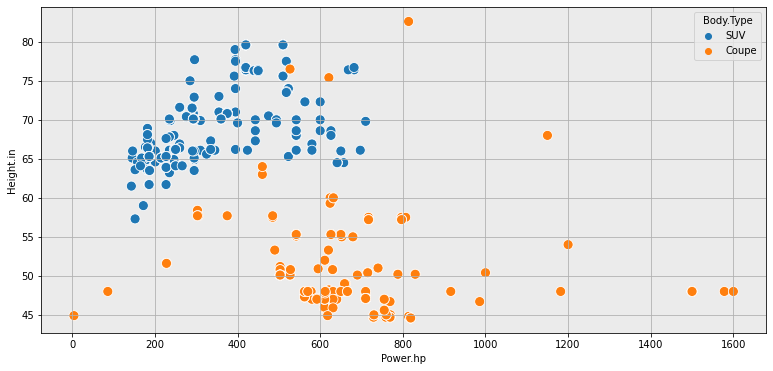

In [8]:
plt.figure(figsize=(13,6))

sns.set_style(rc = {'axes.facecolor': '#EBEBEB'})

sns.scatterplot(data=autos_sliced_df, x='Power.hp', y='Height.in', s=100, hue ='Body.Type')

plt.grid()

plt.show()

In [9]:
# Crear el clasificador KNN con k=3
modelo_knn = KNeighborsClassifier(n_neighbors=3)

X = autos_sliced_df[['Power.hp', 'Height.in']]
y = autos_sliced_df['Body.Type']

# Entrenar el clasificador
modelo_knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [10]:
# Cargar los datos del vehículo que queremos predecir
veh_1 = {
    'Power.hp': [296],
    'Height.in': [51.6]
}
veh_1_df = pd.DataFrame(veh_1)

# Clasificar
clasif_veh1 = modelo_knn.predict(veh_1_df)
print(clasif_veh1)

['Coupe']


In [11]:
# Cargar los datos del vehículo que queremos predecir
veh_2 = {
    'Power.hp': [280],
    'Height.in': [66]
}
veh_2_df = pd.DataFrame(veh_2)

# Clasificar
clasif_veh2 = modelo_knn.predict(veh_2_df)
print(clasif_veh2)

['SUV']


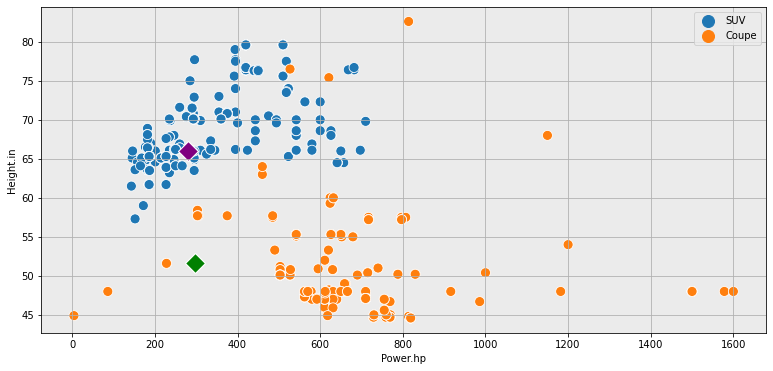

In [12]:
plt.figure(figsize=(13,6))
sns.set_style(rc = {'axes.facecolor': '#EBEBEB'})
sns.scatterplot(data=autos_sliced_df, x='Power.hp', y='Height.in', s=100, hue ='Body.Type')

sns.scatterplot(data=veh_1, x='Power.hp', y='Height.in', color='g', marker='D',s=200)

sns.scatterplot(data=veh_2, x='Power.hp', y='Height.in', color='purple', marker='D', s=200)

plt.legend(markerscale=2)
plt.grid()
plt.show()

In [13]:
print(autos_df.iloc[399])
print("---")
print(autos_df.iloc[1000])

Brand        Jaguar
Body.Type     Coupe
Power.hp      296.0
Height.in      51.6
Name: 839, dtype: object
---
Brand        Alfa Romeo
Body.Type           SUV
Power.hp          280.0
Height.in          66.0
Name: 1834, dtype: object
